# Requirements

In [13]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Add as many imports as you need.

# Laboratory Exercise - Run Mode (8 points)

## Introduction
In this laboratory assignment, the focus is on time series forecasting, specifically targeting the prediction of the current **count of page loads**. Your task involves employing bagging and boosting methods to forecast the **count of page loads**. To accomplish this, you will use data from the preceding three days, consisting of **count of page loads**, **count of unique visits**, **count of first time-visits**, **count of returning visits**, and the current **day**.

**Note: You are required to perform this laboratory assignment on your local machine.**

## The Website Visitors Dataset

## Downloading the Website Visitors Dataset

## Exploring the Website Visitors Dataset
This datatset consists of daily counts of page loads, unique visitors, first-time visitors, and returning visitors for an academic teaching notes website. The dataset contains 2167 rows spanning from September 14, 2014, to August 19, 2020. A visit is defined as a series of hits on one or more pages by the same user on a given day, identified by IP address. Shared IP addresses are considered a single user. A visit is "unique" if a hit from the same IP address hasn't occurred within the last 6 hours. Returning visitors are identified by cookies, and the rest are classified as first-time visitors. The unique visitor count is the sum of returning and first-time visitors.

The dataset consists of the following columns:
- date - date in mm/dd/yyyy format,
- day_of_week - day of the week in text form (Monday, Tuesday, etc.),
- page_loads - daily number of pages loaded,
- unique_visits - daily number of visitors from IP addresses with no hits in over 6 hours,
- first_time_visits - number of unique visitors without a identifying cookie, and
- returning_visits - number of unique visitors minus first-time visitors.

*Note: The dataset is complete, with no missing values in any of its entries.*

Load the dataset into a `pandas` data frame.

In [2]:
# Write your code here. Add as many boxes as you need.
df = pd.read_csv("website-visitors.csv")
df

,date,day_of_week,page_loads,unique_visits,first_time_visits,returning_visits
0,9/14/2014,Sunday,2.146,1.582,1.430,152.0
1,9/15/2014,Monday,3.621,2.528,2.297,231.0
2,9/16/2014,Tuesday,3.698,2.630,2.352,278.0
3,9/17/2014,Wednesday,3.667,2.614,2.327,287.0
4,9/18/2014,Thursday,3.316,2.366,2.130,236.0
...,...,...,...,...,...,...
2162,8/15/2020,Saturday,2.221,1.696,1.373,323.0
2163,8/16/2020,Sunday,2.724,2.037,1.686,351.0
2164,8/17/2020,Monday,3.456,2.638,2.181,457.0
2165,8/18/2020,Tuesday,3.581,2.683,2.184,499.0


In [4]:
df["date"] = pd.to_datetime(df["date"])
df.set_index(keys=["date"], inplace=True)
df.sort_index(inplace=True)
df

,day_of_week,page_loads,unique_visits,first_time_visits,returning_visits
date,,,,,
2014-09-14,Sunday,2.146,1.582,1.430,152.0
2014-09-15,Monday,3.621,2.528,2.297,231.0
2014-09-16,Tuesday,3.698,2.630,2.352,278.0
2014-09-17,Wednesday,3.667,2.614,2.327,287.0
2014-09-18,Thursday,3.316,2.366,2.130,236.0
...,...,...,...,...,...
2020-08-15,Saturday,2.221,1.696,1.373,323.0
2020-08-16,Sunday,2.724,2.037,1.686,351.0
2020-08-17,Monday,3.456,2.638,2.181,457.0


Explore the dataset using visualizations of your choice.

<Axes: xlabel='day_of_week', ylabel='page_loads'>

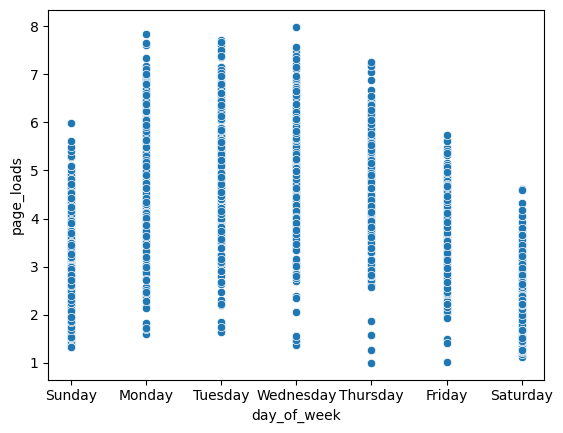

In [5]:
# Write your code here. Add as many boxes as you need.
sns.scatterplot(data=df, x='day_of_week', y='page_loads')

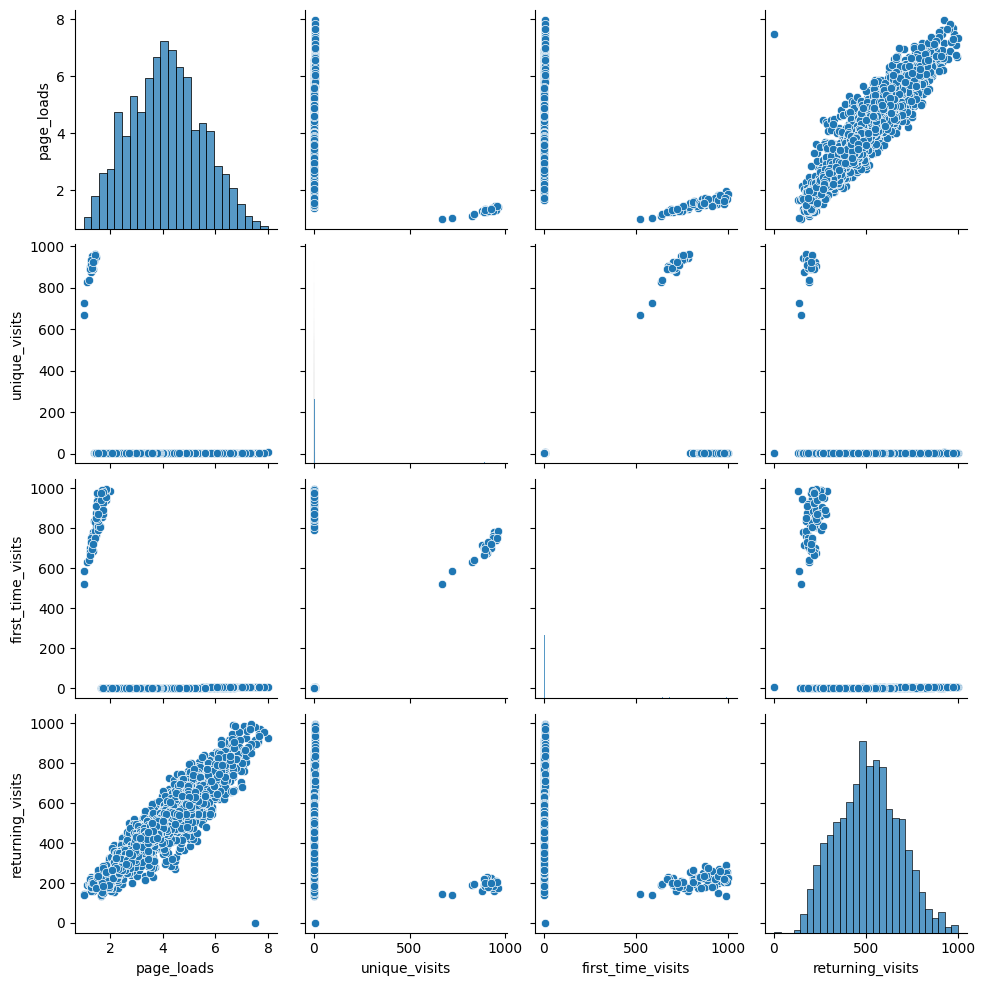

In [6]:
sns.pairplot(df)

Encode the categorical features.

In [14]:
# Write your code here. Add as many boxes as you need.
encoder = LabelEncoder()
df['day_of_week'] = encoder.fit_transform(df['day_of_week'])
df

,day_of_week,page_loads,unique_visits,first_time_visits,returning_visits
date,,,,,
2014-09-14,3,2.146,1.582,1.430,152.0
2014-09-15,1,3.621,2.528,2.297,231.0
2014-09-16,5,3.698,2.630,2.352,278.0
2014-09-17,6,3.667,2.614,2.327,287.0
2014-09-18,4,3.316,2.366,2.130,236.0
...,...,...,...,...,...
2020-08-15,2,2.221,1.696,1.373,323.0
2020-08-16,3,2.724,2.037,1.686,351.0
2020-08-17,1,3.456,2.638,2.181,457.0


<Axes: >

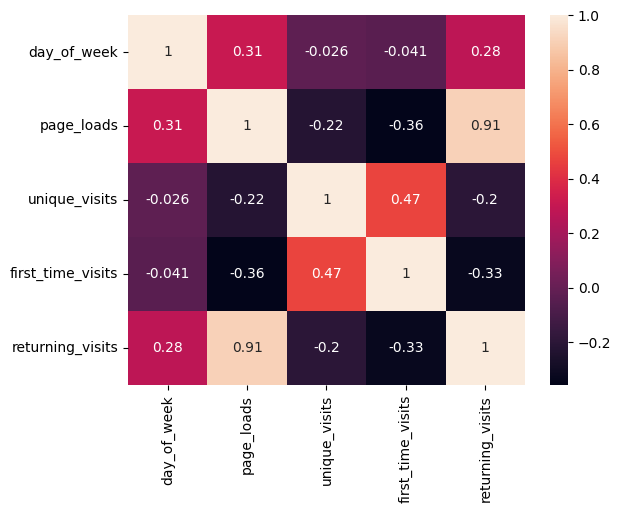

In [15]:
sns.heatmap(df.corr(), annot=True)

In [16]:
df.drop(columns=['returning_visits'], inplace=True)
df

,day_of_week,page_loads,unique_visits,first_time_visits
date,,,,
2014-09-14,3,2.146,1.582,1.430
2014-09-15,1,3.621,2.528,2.297
2014-09-16,5,3.698,2.630,2.352
2014-09-17,6,3.667,2.614,2.327
2014-09-18,4,3.316,2.366,2.130
...,...,...,...,...
2020-08-15,2,2.221,1.696,1.373
2020-08-16,3,2.724,2.037,1.686
2020-08-17,1,3.456,2.638,2.181


# Feauture Extraction
Apply a lag of one, two, and three days to each chosen feature (except `day_of_week`), creating a set of features representing the statistics from the previous three days. To maintain dataset integrity, eliminate any resulting missing values at the beginning of the dataset.

Hint: Use `df['column_name'].shift(period)`. Check the documentation at https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html.

In [17]:
# Write your code here. Add as many boxes as you need.
features = ['unique_visits', 'first_time_visits']
target = 'page_loads'

In [18]:
lags = range(3, 0, -1)
list(lags)

[3, 2, 1]

In [19]:
for lag in lags:
    for column in features + [target]:
        df[f"{column}_{lag}"] = df[column].shift(lag)
df

,day_of_week,page_loads,unique_visits,first_time_visits,unique_visits_3,first_time_visits_3,page_loads_3,unique_visits_2,first_time_visits_2,page_loads_2,unique_visits_1,first_time_visits_1,page_loads_1
date,,,,,,,,,,,,,
2014-09-14,3,2.146,1.582,1.430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-15,1,3.621,2.528,2.297,NaN,NaN,NaN,NaN,NaN,NaN,1.582,1.430,2.146
2014-09-16,5,3.698,2.630,2.352,NaN,NaN,NaN,1.582,1.430,2.146,2.528,2.297,3.621
2014-09-17,6,3.667,2.614,2.327,1.582,1.430,2.146,2.528,2.297,3.621,2.630,2.352,3.698
2014-09-18,4,3.316,2.366,2.130,2.528,2.297,3.621,2.630,2.352,3.698,2.614,2.327,3.667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-15,2,2.221,1.696,1.373,2.904,2.477,3.767,2.780,2.322,3.621,2.308,1.922,2.971
2020-08-16,3,2.724,2.037,1.686,2.780,2.322,3.621,2.308,1.922,2.971,1.696,1.373,2.221
2020-08-17,1,3.456,2.638,2.181,2.308,1.922,2.971,1.696,1.373,2.221,2.037,1.686,2.724


In [20]:
df.drop(columns=features, inplace=True)
df.dropna(axis=0, inplace=True)
df

,day_of_week,page_loads,unique_visits_3,first_time_visits_3,page_loads_3,unique_visits_2,first_time_visits_2,page_loads_2,unique_visits_1,first_time_visits_1,page_loads_1
date,,,,,,,,,,,
2014-09-17,6,3.667,1.582,1.430,2.146,2.528,2.297,3.621,2.630,2.352,3.698
2014-09-18,4,3.316,2.528,2.297,3.621,2.630,2.352,3.698,2.614,2.327,3.667
2014-09-19,0,2.815,2.630,2.352,3.698,2.614,2.327,3.667,2.366,2.130,3.316
2014-09-20,2,1.658,2.614,2.327,3.667,2.366,2.130,3.316,1.863,1.622,2.815
2014-09-21,3,2.288,2.366,2.130,3.316,1.863,1.622,2.815,1.118,985.000,1.658
...,...,...,...,...,...,...,...,...,...,...,...
2020-08-15,2,2.221,2.904,2.477,3.767,2.780,2.322,3.621,2.308,1.922,2.971
2020-08-16,3,2.724,2.780,2.322,3.621,2.308,1.922,2.971,1.696,1.373,2.221
2020-08-17,1,3.456,2.308,1.922,2.971,1.696,1.373,2.221,2.037,1.686,2.724


## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

**WARNING: DO NOT SHUFFLE THE DATASET.**



In [21]:
# Write your code here. Add as many boxes as you need.
from sklearn.model_selection import train_test_split

In [22]:
X, y = df.drop(columns=[target]), df[target]

In [23]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.20, shuffle=False)

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
scaler = MinMaxScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)

In [26]:
lag = 3
(train_X.shape[0], lag, (train_X.shape[1] // lag))

(1731, 3, 3)

In [27]:
from xgboost import XGBRegressor

## Ensemble Learning Methods

### Boosting

Create an instance of an XGBoost model and train it using the `fit` function.

In [28]:
# Write your code here. Add as many boxes as you need.
regressor = XGBRegressor(n_estimators=100).fit(train_X, train_y)

Use the trained model to make predictions for the test set.

In [29]:
# Write your code here. Add as many boxes as you need.
pred_y = regressor.predict(test_X)

Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

In [30]:
# Write your code here. Add as many boxes as you need.
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
(mean_absolute_error(test_y, pred_y), mean_squared_error(test_y, pred_y), r2_score(test_y, pred_y))

(np.float64(0.313413262127178),
 np.float64(0.17988901653261513),
 0.8719221225964979)

# Laboratory Exercise - Bonus Task (+ 2 points)

As part of the bonus task in this laboratory assignment, your objective is to fine-tune the number of estimators (`n_estimators`) for the XGBoost model using a cross-validation with grid search and time series split. This involves systematically experimenting with various values for `n_estimators` and evaluating the model's performance using cross-validation. Upon determining the most suitable `n_estimators` value, evaluate the model's performance on a test set for final assessment.

Hints:
- For grid search use the `GridCVSearch` from the `scikit-learn` library. Check the documentation at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html.
- For cross-validation use the `TimeSeriesSplit` from the `scikit-learn` library. Check the documentation at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html.

## Fine-tuning the XGBoost Hyperparameter
Experiment with various values for `n_estimators` and evaluate the model's performance using cross-validation.

In [31]:
# Write your code here. Add as many boxes as you need.
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit

In [32]:
grid_search = GridSearchCV(
    estimator=XGBRegressor(),
    param_grid={
        "n_estimators": [80, 90, 100, 110, 120, 70],
        "max_depth": [2, 3, 4, 5, 6, 7, 8, 9, 10]
    },
    cv=TimeSeriesSplit(n_splits=5)
)

In [33]:
grid_search.fit(train_X, train_y)

D:\anaconda\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, imp...
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [80, 90, 100, 110, 120, 70]})

In [34]:
grid_search.best_params_

{'max_depth': 3, 'n_estimators': 110}

## Final Assessment of the Model Performance
Upon determining the most suitable `n_estimators` value, evaluate the model's performance on a test set for final assessment.

In [35]:
# Write your code here. Add as many boxes as you need.
regressor = XGBRegressor(n_estimators=110, max_depth=3).fit(train_X, train_y)

In [36]:
pred_y = regressor.predict(test_X)

In [37]:
(mean_absolute_error(test_y, pred_y), mean_squared_error(test_y, pred_y), r2_score(test_y, pred_y))

(np.float64(0.2951716523820203),
 np.float64(0.15106265190706417),
 0.892445997070127)

<Axes: xlabel='date'>

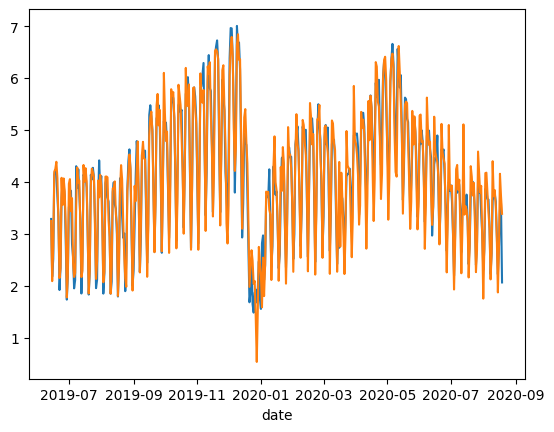

In [38]:
sns.lineplot(x=test_y.index, y=test_y.values)
sns.lineplot(x=test_y.index, y=pred_y)

# LSTM

In [70]:
df = pd.read_csv("website-visitors.csv")
df

,date,day_of_week,page_loads,unique_visits,first_time_visits,returning_visits
0,9/14/2014,Sunday,2.146,1.582,1.430,152.0
1,9/15/2014,Monday,3.621,2.528,2.297,231.0
2,9/16/2014,Tuesday,3.698,2.630,2.352,278.0
3,9/17/2014,Wednesday,3.667,2.614,2.327,287.0
4,9/18/2014,Thursday,3.316,2.366,2.130,236.0
...,...,...,...,...,...,...
2162,8/15/2020,Saturday,2.221,1.696,1.373,323.0
2163,8/16/2020,Sunday,2.724,2.037,1.686,351.0
2164,8/17/2020,Monday,3.456,2.638,2.181,457.0
2165,8/18/2020,Tuesday,3.581,2.683,2.184,499.0


In [71]:
df["date"] = pd.to_datetime(df["date"])
df.set_index(keys=["date"], inplace=True)
df.sort_index(inplace=True)
df

,day_of_week,page_loads,unique_visits,first_time_visits,returning_visits
date,,,,,
2014-09-14,Sunday,2.146,1.582,1.430,152.0
2014-09-15,Monday,3.621,2.528,2.297,231.0
2014-09-16,Tuesday,3.698,2.630,2.352,278.0
2014-09-17,Wednesday,3.667,2.614,2.327,287.0
2014-09-18,Thursday,3.316,2.366,2.130,236.0
...,...,...,...,...,...
2020-08-15,Saturday,2.221,1.696,1.373,323.0
2020-08-16,Sunday,2.724,2.037,1.686,351.0
2020-08-17,Monday,3.456,2.638,2.181,457.0


In [72]:
encoder = LabelEncoder()
df['day_of_week'] = encoder.fit_transform(df['day_of_week'])
df

,day_of_week,page_loads,unique_visits,first_time_visits,returning_visits
date,,,,,
2014-09-14,3,2.146,1.582,1.430,152.0
2014-09-15,1,3.621,2.528,2.297,231.0
2014-09-16,5,3.698,2.630,2.352,278.0
2014-09-17,6,3.667,2.614,2.327,287.0
2014-09-18,4,3.316,2.366,2.130,236.0
...,...,...,...,...,...
2020-08-15,2,2.221,1.696,1.373,323.0
2020-08-16,3,2.724,2.037,1.686,351.0
2020-08-17,1,3.456,2.638,2.181,457.0


In [73]:
df.drop(columns=['day_of_week', 'returning_visits'], inplace=True)
df

,page_loads,unique_visits,first_time_visits
date,,,
2014-09-14,2.146,1.582,1.430
2014-09-15,3.621,2.528,2.297
2014-09-16,3.698,2.630,2.352
2014-09-17,3.667,2.614,2.327
2014-09-18,3.316,2.366,2.130
...,...,...,...
2020-08-15,2.221,1.696,1.373
2020-08-16,2.724,2.037,1.686
2020-08-17,3.456,2.638,2.181


In [74]:
features = ['unique_visits', 'first_time_visits']
target = 'page_loads'

In [75]:
lags = range(3, 0, -1)
list(lags)

[3, 2, 1]

In [76]:
for lag in lags:
    for column in features + [target]:
        df[f"{column}_{lag}"] = df[column].shift(lag)
df

,page_loads,unique_visits,first_time_visits,unique_visits_3,first_time_visits_3,page_loads_3,unique_visits_2,first_time_visits_2,page_loads_2,unique_visits_1,first_time_visits_1,page_loads_1
date,,,,,,,,,,,,
2014-09-14,2.146,1.582,1.430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-15,3.621,2.528,2.297,NaN,NaN,NaN,NaN,NaN,NaN,1.582,1.430,2.146
2014-09-16,3.698,2.630,2.352,NaN,NaN,NaN,1.582,1.430,2.146,2.528,2.297,3.621
2014-09-17,3.667,2.614,2.327,1.582,1.430,2.146,2.528,2.297,3.621,2.630,2.352,3.698
2014-09-18,3.316,2.366,2.130,2.528,2.297,3.621,2.630,2.352,3.698,2.614,2.327,3.667
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-15,2.221,1.696,1.373,2.904,2.477,3.767,2.780,2.322,3.621,2.308,1.922,2.971
2020-08-16,2.724,2.037,1.686,2.780,2.322,3.621,2.308,1.922,2.971,1.696,1.373,2.221
2020-08-17,3.456,2.638,2.181,2.308,1.922,2.971,1.696,1.373,2.221,2.037,1.686,2.724


In [77]:
df.drop(columns=features, inplace=True)
df.dropna(axis=0, inplace=True)
df

,page_loads,unique_visits_3,first_time_visits_3,page_loads_3,unique_visits_2,first_time_visits_2,page_loads_2,unique_visits_1,first_time_visits_1,page_loads_1
date,,,,,,,,,,
2014-09-17,3.667,1.582,1.430,2.146,2.528,2.297,3.621,2.630,2.352,3.698
2014-09-18,3.316,2.528,2.297,3.621,2.630,2.352,3.698,2.614,2.327,3.667
2014-09-19,2.815,2.630,2.352,3.698,2.614,2.327,3.667,2.366,2.130,3.316
2014-09-20,1.658,2.614,2.327,3.667,2.366,2.130,3.316,1.863,1.622,2.815
2014-09-21,2.288,2.366,2.130,3.316,1.863,1.622,2.815,1.118,985.000,1.658
...,...,...,...,...,...,...,...,...,...,...
2020-08-15,2.221,2.904,2.477,3.767,2.780,2.322,3.621,2.308,1.922,2.971
2020-08-16,2.724,2.780,2.322,3.621,2.308,1.922,2.971,1.696,1.373,2.221
2020-08-17,3.456,2.308,1.922,2.971,1.696,1.373,2.221,2.037,1.686,2.724


In [78]:
X, y = df.drop(columns=[target]), df[target]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.20, shuffle=False)

In [79]:
scaler = MinMaxScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)

In [80]:
scaler = MinMaxScaler()
train_y = scaler.fit_transform(train_y.to_numpy().reshape(-1, 1))

In [81]:
lag = 3
(train_X.shape[0], lag, (train_X.shape[1] // lag))

(1731, 3, 3)

In [82]:
train_X = train_X.reshape((train_X.shape[0], lag, (train_X.shape[1] // lag)))
test_X = test_X.reshape((test_X.shape[0], lag, (test_X.shape[1] // lag)))

In [83]:
from keras.models import Sequential
from keras.layers import Input, LSTM, Dense

In [132]:
model = Sequential([
    Input((train_X.shape[1], train_X.shape[2],)),
    LSTM(64, activation="relu", return_sequences=True),
    LSTM(32, activation="relu", return_sequences=True),
    LSTM(16, activation="relu"),
    Dense(1, activation="linear")
])

In [133]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_18 (LSTM)                       │ (None, 3, 64)               │          17,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_19 (LSTM)                       │ (None, 3, 32)               │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_20 (LSTM)                       │ (None, 16)                  │           3,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32,977 (128.82 KB)

 Trainable params: 32,977 (128.82 KB)

 Non-trainable params: 0 (0.00 B)

In [134]:
model.compile(
    loss="mean_squared_error",
    optimizer="adam",
    metrics=["mean_squared_error"],
)

In [135]:
history = model.fit(train_X, train_y, validation_split=0.20, epochs=25, batch_size=64, shuffle=False)

Epoch 1/25
22/22 ━━━━━━━━━━━━━━━━━━━━ 14s 94ms/step - loss: 0.2029 - mean_squared_error: 0.2029 - val_loss: 0.2137 - val_mean_squared_error: 0.2137
Epoch 2/25
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.1206 - mean_squared_error: 0.1206 - val_loss: 0.0700 - val_mean_squared_error: 0.0700
Epoch 3/25
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0376 - mean_squared_error: 0.0376 - val_loss: 0.0435 - val_mean_squared_error: 0.0435
Epoch 4/25
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0351 - mean_squared_error: 0.0351 - val_loss: 0.0438 - val_mean_squared_error: 0.0438
Epoch 5/25
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0333 - mean_squared_error: 0.0333 - val_loss: 0.0422 - val_mean_squared_error: 0.0422
Epoch 6/25
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0329 - mean_squared_error: 0.0329 - val_loss: 0.0415 - val_mean_squared_error: 0.0415
Epoch 7/25
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0322 - mean_squared_error: 0.0322 - val_loss: 0.0408 - v

<Axes: >

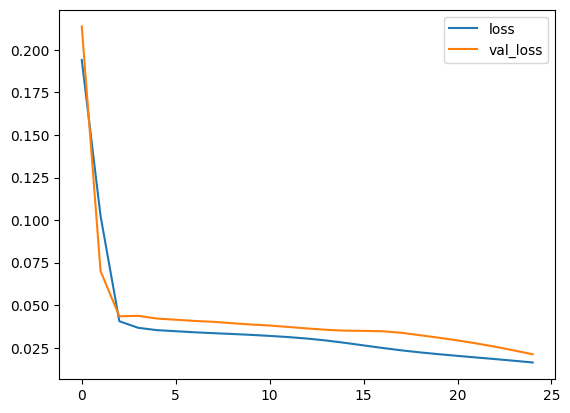

In [136]:
sns.lineplot(history.history["loss"], label="loss")
sns.lineplot(history.history["val_loss"], label="val_loss")

In [137]:
pred_y = model.predict(test_X)

14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step


In [138]:
pred_y = scaler.inverse_transform(pred_y)

In [139]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
(mean_absolute_error(test_y, pred_y), mean_squared_error(test_y, pred_y), r2_score(test_y, pred_y))

(np.float64(0.6244862877711412),
 np.float64(0.6187166836607839),
 0.5594843916274355)